# Feature Engineering

This notebook focuses on adding relevent and helpful features for model to train more efficiently.

## What we will do:
1. Adding Binary Indicators
2. Adding HouseAge feature
3. Adding RemodelAge feature
4. Adding AreaPerSpace feature

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('default')

In [107]:
# Load the cleaned training data (using pickle to preserve category dtypes)
data_path = '../../data/processed/train_cleaned.pkl'
df = pd.read_pickle(data_path)


print(f"Shape: {df.shape}")
# In order to check if the data types are preserved; category type columns should be 47
print("\nCount of 'category' dtype columns:", (df.dtypes == 'category').sum())


Shape: (1458, 81)

Count of 'category' dtype columns: 47


## 1. Adding binary indicators

In [108]:
# Create binary indicators for originally missing important features
missing_indicators = {
    'HasBasement': df['BsmtQual'] != 'None',
    'HasGarage': df['GarageType'] != 'None',
    'HasFireplace': df['FireplaceQu'] != 'None',
    'HasPool': df['PoolQC'] != 'None',
    'HasFence': df['Fence'] != 'None',
    'HasAlley': df['Alley'] != 'None'
}

for feature, condition in missing_indicators.items():
    df[feature] = condition.astype(int)
    print(f"Created {feature}: {df[feature].sum()} houses have this feature")

print(f"\nAdded {len(missing_indicators)} binary indicator features")

Created HasBasement: 1421 houses have this feature
Created HasGarage: 1377 houses have this feature
Created HasFireplace: 768 houses have this feature
Created HasPool: 6 houses have this feature
Created HasFence: 281 houses have this feature
Created HasAlley: 91 houses have this feature

Added 6 binary indicator features


In [109]:
df.shape

(1458, 87)

## 2. Adding HouseAge feature

In [110]:
# Create a new column for the age of the house
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

# Print the first few rows of the DataFrame to verify the new column
print(df[['YearBuilt', 'YrSold', 'HouseAge']].head())

   YearBuilt  YrSold  HouseAge
0       2003    2008         5
1       1976    2007        31
2       2001    2008         7
3       1915    2006        91
4       2000    2008         8


In [111]:
df.shape

(1458, 88)

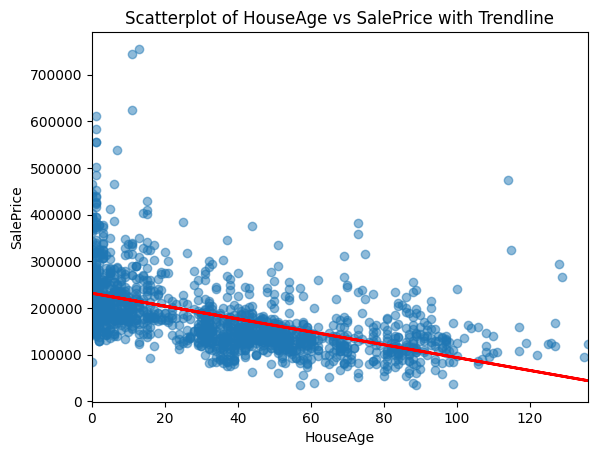

In [112]:
# Scatter plot of HouseAge vs SalePrice with trendline
plt.scatter(df['HouseAge'], df['SalePrice'], alpha=0.5)
# Calculate and plot trendline
z = np.polyfit(df['HouseAge'], df['SalePrice'], 1)
p = np.poly1d(z)
plt.plot(df['HouseAge'], p(df['HouseAge']), color='red', linewidth=2)
plt.xlabel('HouseAge')
plt.ylabel('SalePrice')
plt.title('Scatterplot of HouseAge vs SalePrice with Trendline')
plt.xlim(df['HouseAge'].min(), df['HouseAge'].max())
plt.show()


## 3. Adding ReModelAge feature

In [113]:
# Create a new column for the age of the house when it was remodeled
df['RemodelAge'] = df['YrSold'] - df['YearRemodAdd']

# Print the first few rows of the DataFrame to verify the new column
print(df[['YearRemodAdd', 'YrSold', 'RemodelAge']].head())


   YearRemodAdd  YrSold  RemodelAge
0          2003    2008           5
1          1976    2007          31
2          2002    2008           6
3          1970    2006          36
4          2000    2008           8


In [114]:
df.shape

(1458, 89)

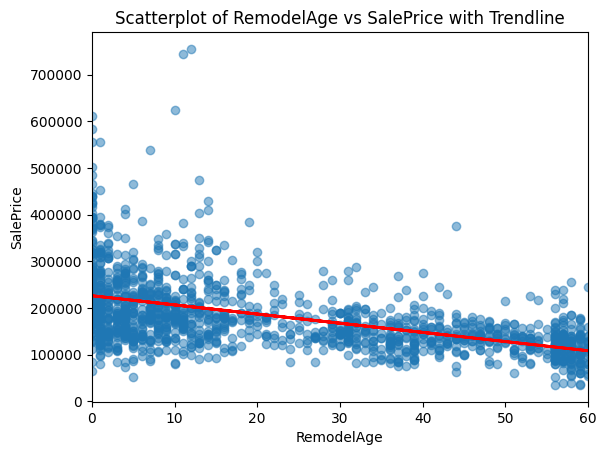

In [115]:
plt.scatter(df['RemodelAge'], df['SalePrice'], alpha=0.5)
# Calculate and plot trendline
z = np.polyfit(df['RemodelAge'], df['SalePrice'], 1)
p = np.poly1d(z)
plt.plot(df['RemodelAge'], p(df['RemodelAge']), color='red', linewidth=2)
plt.xlabel('RemodelAge')
plt.ylabel('SalePrice')
plt.title('Scatterplot of RemodelAge vs SalePrice with Trendline')
plt.xlim(df['RemodelAge'].min(), df['RemodelAge'].max())
plt.show()


## 4. Adding AreaPerSpace feature

In [116]:
# Calculate average space size as GrLivArea divided by TotRmsAbvGrd
# TotRmsAbvGrd is the total number of spaces including kitchen and living room (excluding bathrooms)
df['AreaPerSpace'] = df['GrLivArea'] / df['TotRmsAbvGrd']


# Show basic statistics for the new feature
print("AreaPerSpace feature statistics:")
print(df['AreaPerSpace'].describe())


AreaPerSpace feature statistics:
count    1458.000000
mean      230.608073
std        44.036252
min       120.000000
25%       199.000000
50%       226.450000
75%       255.741071
max       447.600000
Name: AreaPerSpace, dtype: float64


In [117]:
df.shape

(1458, 90)

In [118]:
# Save the dataframe as a pickle file for future use
df.to_pickle('../../data/processed/feature_engineered_df.pkl')
